In [1]:
# # Do not forget to check if your notebook log collection plugin is working
from mining_extension import check_logging
check_logging("http://3.249.245.244:9999")

Request successful!


## Data Engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import zipfile
import datetime

In [3]:
with zipfile.ZipFile('data/task1/jetnet_logs.zip') as myzip:
    with myzip.open('jetnet_logs.txt') as myfile:
        df = pd.read_csv(myfile, delimiter='\t', header=None)

In [4]:
df

,0
0,@User92: Action_3 (15/10/19 | 18:08:02) -> Act...
1,@User140: Action_3 (15/05/20 | 15:37:04) -> Ac...
2,@User105: Action_4 (25/04/20 | 01:08:29) -> Ac...
3,@User127: Action_1 (20/06/20 | 00:24:48) -> Ac...
4,@User50: Action_4 (09/10/19 | 15:12:52) --> Ac...
...,...
87187,@User69: Action_6 (29/06/21 | 22:15:46) -> Act...
87188,@User70: Action_10 (09/04/21 | 17:23:14) -> Ac...
87189,@User47: Action_3 (26/10/20 | 22:03:25) --> Ac...
87190,@User112: Action_2 (07/07/21 | 17:46:03) -> Ac...


In [5]:
df['user_id'] = df[0].str.split(':').str[0]
df['user_id'] = df['user_id'].str.replace('@', '')

In [6]:
df['into'] = df[0].str.split(': ').str[1]

In [7]:
df = df.drop(0, axis=1)

In [8]:
df

,user_id,into
0,User92,Action_3 (15/10/19 | 18:08:02) -> Action_1 (15...
1,User140,Action_3 (15/05/20 | 15:37:04) -> Action_8 (15...
2,User105,Action_4 (25/04/20 | 01:08:29) -> Action_7 (25...
3,User127,Action_1 (20/06/20 | 00:24:48) -> Action_2 (20...
4,User50,Action_4 (09/10/19 | 15:12:52) --> Action_8 (0...
...,...,...
87187,User69,Action_6 (29/06/21 | 22:15:46) -> Action_7 (29...
87188,User70,Action_10 (09/04/21 | 17:23:14) -> Action_4 (0...
87189,User47,Action_3 (26/10/20 | 22:03:25) --> Action_7 (2...
87190,User112,Action_2 (07/07/21 | 17:46:03) -> Action_3 (07...


In [9]:
df = df.assign(actions=df['into'].str.split('>')).explode('actions')
df['actions'] = df['actions'].str.strip('-')
df = df.drop(columns='into').reset_index(drop=True)

In [10]:
df

,user_id,actions
0,User92,Action_3 (15/10/19 | 18:08:02)
1,User92,Action_1 (15/10/19 | 18:54:49)
2,User92,Action_10 (15/10/19 | 20:02:54)
3,User92,Action_7 (15/10/19 | 20:26:56)
4,User92,Action_0 (15/10/19 | 20:51:09)
...,...,...
2053516,User112,END (08/07/21 | 03:18:55)
2053517,User76,Action_7 (28/07/21 | 14:35:47)
2053518,User76,Action_9 (28/07/21 | 15:09:53)
2053519,User76,Action_1 (28/07/21 | 14:59:10)


In [11]:
df['action_time'] = df['actions'].str.split(n=1).str[1].str.strip(' ')
df['action_time'] = pd.to_datetime(df['action_time'], format='(%d/%m/%y | %H:%M:%S)', errors='coerce')

In [12]:
df

,user_id,actions,action_time
0,User92,Action_3 (15/10/19 | 18:08:02),2019-10-15 18:08:02
1,User92,Action_1 (15/10/19 | 18:54:49),2019-10-15 18:54:49
2,User92,Action_10 (15/10/19 | 20:02:54),2019-10-15 20:02:54
3,User92,Action_7 (15/10/19 | 20:26:56),2019-10-15 20:26:56
4,User92,Action_0 (15/10/19 | 20:51:09),2019-10-15 20:51:09
...,...,...,...
2053516,User112,END (08/07/21 | 03:18:55),2021-07-08 03:18:55
2053517,User76,Action_7 (28/07/21 | 14:35:47),2021-07-28 14:35:47
2053518,User76,Action_9 (28/07/21 | 15:09:53),2021-07-28 15:09:53
2053519,User76,Action_1 (28/07/21 | 14:59:10),2021-07-28 14:59:10


In [13]:
df['action_name'] = df['actions'].str.split().str.get(0)

In [14]:
df

,user_id,actions,action_time,action_name
0,User92,Action_3 (15/10/19 | 18:08:02),2019-10-15 18:08:02,Action_3
1,User92,Action_1 (15/10/19 | 18:54:49),2019-10-15 18:54:49,Action_1
2,User92,Action_10 (15/10/19 | 20:02:54),2019-10-15 20:02:54,Action_10
3,User92,Action_7 (15/10/19 | 20:26:56),2019-10-15 20:26:56,Action_7
4,User92,Action_0 (15/10/19 | 20:51:09),2019-10-15 20:51:09,Action_0
...,...,...,...,...
2053516,User112,END (08/07/21 | 03:18:55),2021-07-08 03:18:55,END
2053517,User76,Action_7 (28/07/21 | 14:35:47),2021-07-28 14:35:47,Action_7
2053518,User76,Action_9 (28/07/21 | 15:09:53),2021-07-28 15:09:53,Action_9
2053519,User76,Action_1 (28/07/21 | 14:59:10),2021-07-28 14:59:10,Action_1


In [15]:
df = df.sort_values(['user_id', 'action_time'])

In [16]:
df

,user_id,actions,action_time,action_name
1755858,User0,Action_10 (21/09/19 | 15:51:54),2019-09-21 15:51:54,Action_10
452977,User0,Action_3 (21/09/19 | 15:54:18),2019-09-21 15:54:18,Action_3
1755859,User0,Action_4 (21/09/19 | 15:57:09),2019-09-21 15:57:09,Action_4
452978,User0,Action_0 (21/09/19 | 16:05:32),2019-09-21 16:05:32,Action_0
452981,User0,Action_4 (21/09/19 | 16:23:28),2019-09-21 16:23:28,Action_4
...,...,...,...,...
1194195,User99,,NaT,NaN
1265817,User99,,NaT,NaN
1561607,User99,Action_7 27/06/21 | 11:17:35),NaT,Action_7
1561635,User99,,NaT,NaN


In [17]:
df['session_num'] = (df['action_name'] == 'END').groupby(df['user_id']).cumsum()
df = df[df['action_name'] != 'END']
df = df[df['action_name'] != 'null']
df.dropna(how='any', inplace=True)
df = df.reset_index(drop=True)

In [18]:
df

,user_id,actions,action_time,action_name,session_num
0,User0,Action_10 (21/09/19 | 15:51:54),2019-09-21 15:51:54,Action_10,0
1,User0,Action_3 (21/09/19 | 15:54:18),2019-09-21 15:54:18,Action_3,0
2,User0,Action_4 (21/09/19 | 15:57:09),2019-09-21 15:57:09,Action_4,0
3,User0,Action_0 (21/09/19 | 16:05:32),2019-09-21 16:05:32,Action_0,0
4,User0,Action_4 (21/09/19 | 16:23:28),2019-09-21 16:23:28,Action_4,0
...,...,...,...,...,...
1960900,User99,Action_1 (10/09/21 | 05:11:20),2021-09-10 05:11:20,Action_1,126
1960901,User99,Action_3 (10/09/21 | 05:19:58),2021-09-10 05:19:58,Action_3,126
1960902,User99,Action_8 (10/09/21 | 05:39:00),2021-09-10 05:39:00,Action_8,126
1960903,User99,Action_4 (10/09/21 | 06:08:09),2021-09-10 06:08:09,Action_4,127


In [19]:
df = df.drop('actions', axis=1)

In [20]:
df

,user_id,action_time,action_name,session_num
0,User0,2019-09-21 15:51:54,Action_10,0
1,User0,2019-09-21 15:54:18,Action_3,0
2,User0,2019-09-21 15:57:09,Action_4,0
3,User0,2019-09-21 16:05:32,Action_0,0
4,User0,2019-09-21 16:23:28,Action_4,0
...,...,...,...,...
1960900,User99,2021-09-10 05:11:20,Action_1,126
1960901,User99,2021-09-10 05:19:58,Action_3,126
1960902,User99,2021-09-10 05:39:00,Action_8,126
1960903,User99,2021-09-10 06:08:09,Action_4,127


## Metrics Evaluation

### Mean actions count per user overall:


In [21]:
mean_actions_per_user = pd.DataFrame(df.groupby('user_id')['action_name'].count()).mean()
mean_actions_per_user

action_name    13712.622378
dtype: float64

### Mean actions by user in a day:


In [22]:
df['date'] = df['action_time'].dt.date
mean_actions_per_day = df.groupby(['user_id', 'date'])['action_name'].count().mean()
mean_actions_per_day

28.491587237010346

### Probability of repeating the same action three times in a row during one session:

In [23]:
repeating_action_prob = (df['action_name'] == df['action_name'].shift(1)) & (df['action_name'] == df['action_name'].shift(2))
repeating_action_prob = repeating_action_prob.sum() / len(df)
repeating_action_prob

0.022876171971615147

### 0.95 quantile of the distribution of time delta between actions of the same type during one session:


In [24]:
time_delta_quantile = df.groupby(['user_id', 'session_num', 'action_name'])['action_time'].diff().quantile(0.95)
time_delta_quantile

Timedelta('0 days 07:37:39')

### Statistical difference of activity in different days of the week and between weekends and workdays:


In [25]:
df['weekday'] = df['action_time'].dt.dayofweek
weekday_activity = df.groupby('weekday')['action_name'].count()
weekend_activity = df[df['weekday'].isin([5, 6])]['action_name'].count()
weekend_activity

565091

## Data Visualisation

### the time series (line plot) of count of different actions by days (5 points)

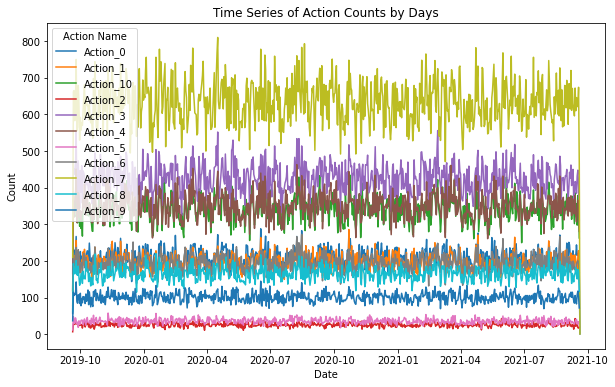

In [26]:
daily_action_counts = df.groupby(['date', 'action_name']).size().unstack()

daily_action_counts.plot(kind='line', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series of Action Counts by Days')
plt.legend(title='Action Name')
plt.show()

### the barchart of different actions counts (5 points)

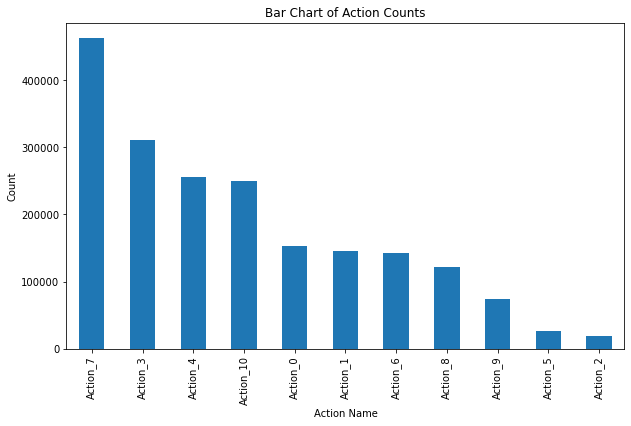

In [27]:
action_counts = df['action_name'].value_counts()

plt.figure(figsize=(10, 6))
action_counts.plot(kind='bar')
plt.xlabel('Action Name')
plt.ylabel('Count')
plt.title('Bar Chart of Action Counts')
plt.show()

### the heatmap of action_i-action_j-count where count is a count of action_i right after the action_j (5 points)

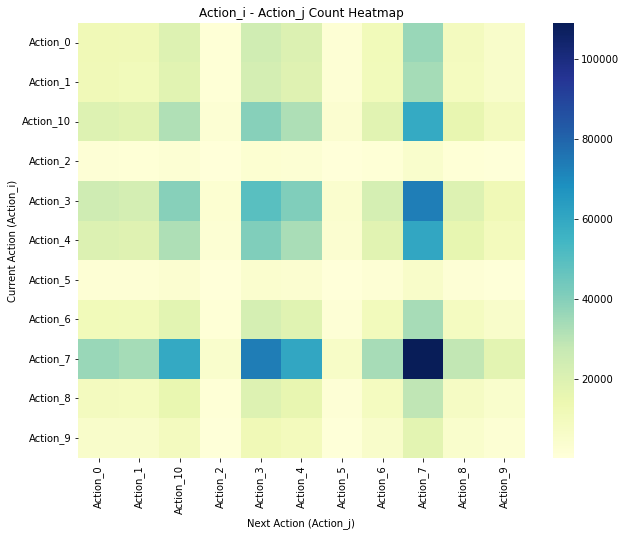

In [30]:
df['next_action_name'] = df.groupby('user_id')['action_name'].shift(-1)
action_count = df.groupby(['action_name', 'next_action_name']).size().reset_index(name='count')
pivot_table = action_count.pivot(index='action_name', columns='next_action_name', values='count')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Action_i - Action_j Count Heatmap')
plt.xlabel('Next Action (Action_j)')
plt.ylabel('Current Action (Action_i)')
plt.show()

### the time series (line plot) of all actions of the top 20 percent of active users by days (5 points)

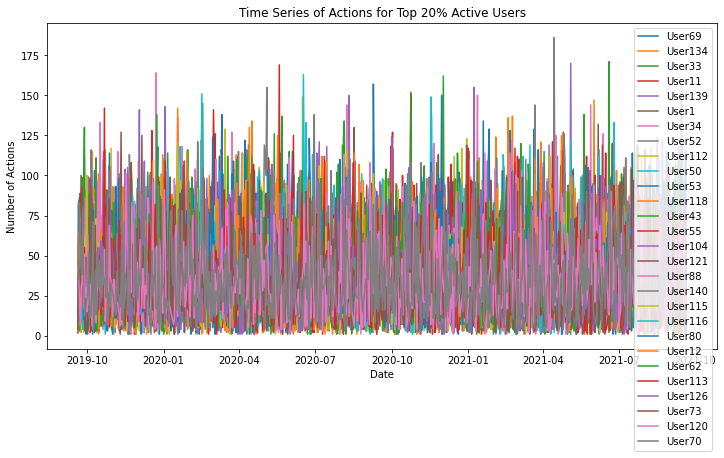

In [28]:
actions_per_day = df.groupby(['user_id', pd.Grouper(key='action_time', freq='D')]).size().reset_index(name='count')
total_actions_per_user = actions_per_day.groupby('user_id')['count'].sum()
top_users = total_actions_per_user.nlargest(int(len(total_actions_per_user) * 0.2)).index
top_users_data = actions_per_day[actions_per_day['user_id'].isin(top_users)]

plt.figure(figsize=(12, 6))
for user in top_users:
    user_data = top_users_data[top_users_data['user_id'] == user]
    plt.plot(user_data['action_time'], user_data['count'], label=user)

plt.xlabel('Date')
plt.ylabel('Number of Actions')
plt.title('Time Series of Actions for Top 20% Active Users')
plt.legend()
plt.show()

### 